In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

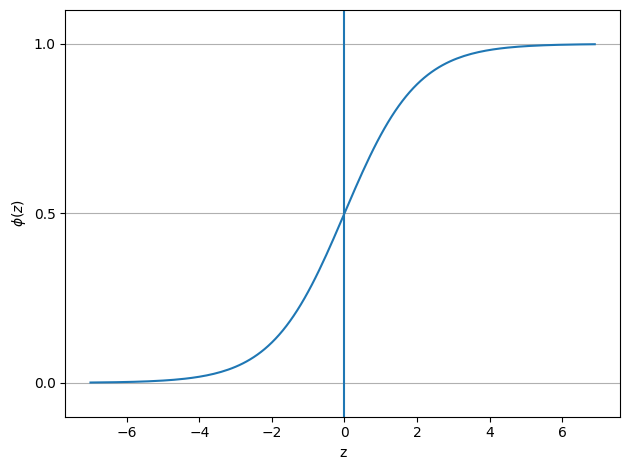

In [3]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0,0)
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$') 
plt.yticks([0,0.5,1])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined_std = np.concatenate([X_train_std, X_test_std],axis=0)
X_combined = np.concatenate([X_train, X_test],axis=0)

# y_combined_std = np.vstack((y_train, y_test))
y_combined = np.concatenate([y_train, y_test],axis=0)

In [27]:
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression(C=100.0, random_state=1, multi_class='ovr')
Ir.fit(X_train_std, y_train)


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

<Axes: >

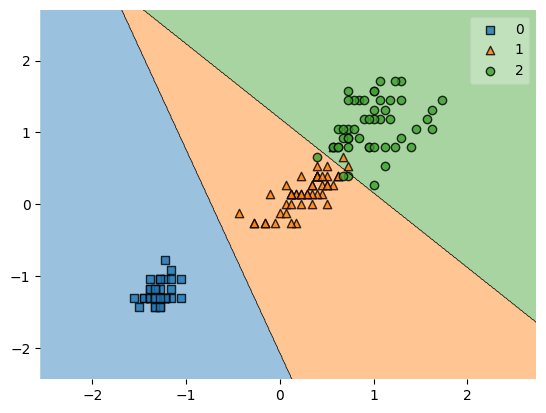

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_combined_std, y_combined,clf=Ir)


<Axes: >

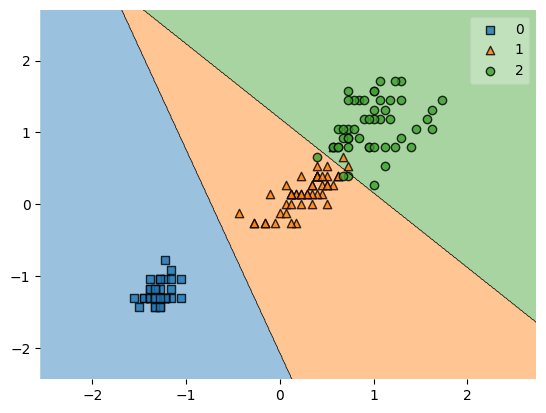

In [9]:
Ir = LogisticRegression(C=100.0, random_state=1, multi_class='ovr',solver='lbfgs')
Ir.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,clf=Ir)


<Axes: >

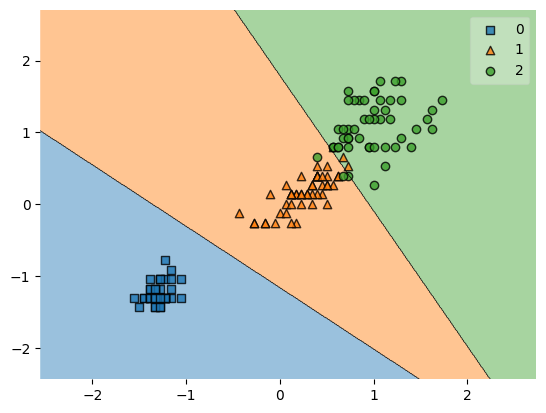

In [10]:
Ir = LogisticRegression(C=100.0, random_state=1, multi_class='multinomial',solver='lbfgs')
Ir.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,clf=Ir)


他クラス分類の手法は自動的にmultinomialかovrで選択されてる。相互排他的なクラスでは、通常はmultinomial推奨

最適化のアルゴリズムはsolverで指定。デフォルトではlbfgsと呼ばれるやつっぽい。が、バージョンによって変わるかも。

cは正則化パラメータ・ラムダの逆数の値


In [11]:
Ir.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

このメソッドでｍデータ点の確率を予測できる。

In [12]:
a = Ir.predict_proba(X_test_std[:3,:]).argmax(axis=1)
print(a)

b = Ir.predict(X_test_std[:3,:])
print(b)

c = Ir.predict(X_test_std[[0],:])
print(c)

[2 0 0]
[2 0 0]
[2]


もっとも一般的な生息化はL2生息化(L2 regularization)

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9863013698630136,
  0.9642857142857143,
  0.9680851063829787,
  0.9619047619047619],
 [0.9555555555555556,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777])

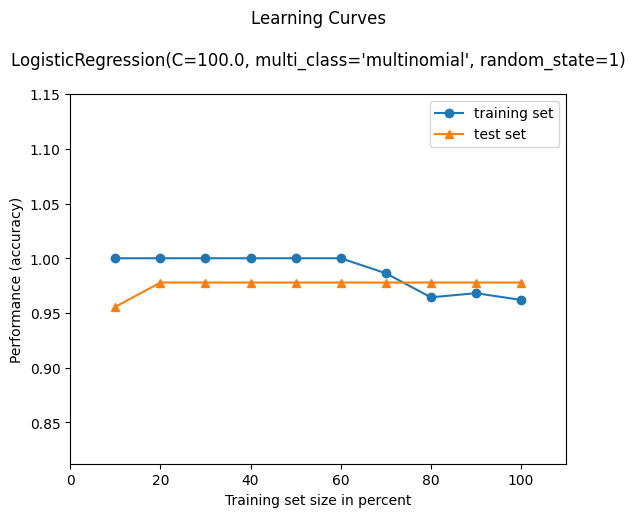

In [13]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf=Ir, scoring='accuracy')

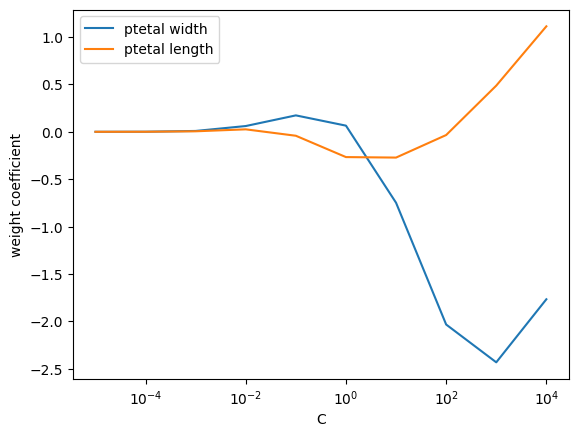

In [14]:
weight=[]
param=[]

for c in np.arange(-5,5):
    Ir=LogisticRegression(C=10.**c, random_state=1,multi_class='multinomial',solver='lbfgs')
    Ir.fit(X_train_std, y_train)
    weight.append(Ir.coef_[1])
    param.append(10.**c)
    
weight = np.array(weight)
plt.plot(param,weight[:,0],label="ptetal width")
plt.plot(param,weight[:,1],label="ptetal length")
plt.ylabel('weight coefficient')
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc='best')
plt.show()

In [15]:
print(X_train_std, y_train)

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.0097479   1.57698181]
 [ 1.56747294  1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.12129291  0.5281578 ]
 [ 0.45202286  0.1348488 ]
 [-0.27301968 -0.2584602 ]
 [ 0.06161534  0.2659518 ]
 [-1.38846976 -1.30728421]
 [ 0.50779537  0.0037458 ]
 [ 0.11738784  0.1348488 ]
 [ 0.73088538  0.92146681]
 [-1.05383474 -1.30728421]
 [-0.16147468 -0.2584602 ]
 [ 0.06161534  0.0037458 ]
 [-1.22115225 -1.30728421]
 [ 0.56356787  0.79036381]
 [ 1.73479045  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.1348488 ]
 [ 0.00584283 -0.1273572 ]
 [ 1.0097479   1.57698181]
 [ 0.50779537  0.2659518 ]
 [ 1.0097479   0.2659518 ]
 [ 1.12129291  1.31477581]
 [ 0.73088538  1.57698181]
 [ 0.17316034  0.1348488 ]
 [-1.27692475 -1.04507821]
 [ 1.62324544  1.31477581]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   1.18367281]
 [ 0.22893285  0.3970548 ]
 

cは正則化のパラメータの逆数。cが大きいとラムダが小さくなり正則化されなくなり過学習ぎみになる。

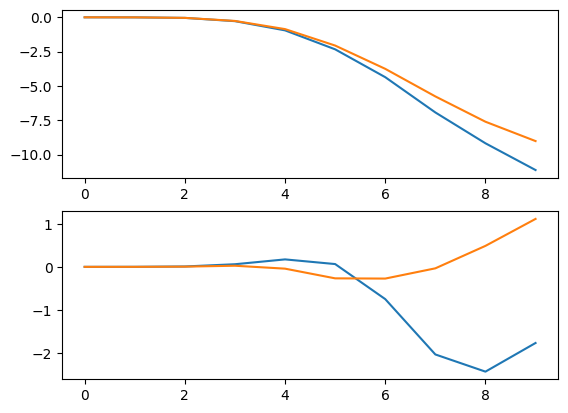

In [16]:
weight=[]
param=[]
coef_0=[]

for c in np.arange(-5,5):
    Ir=LogisticRegression(C=10.**c, random_state=1,multi_class='multinomial',solver='lbfgs')
    Ir.fit(X_train_std, y_train)
    weight.append(Ir.coef_[1])
    param.append(10.**c)
    coef_0.append(Ir.coef_[0])
    
weight = np.array(weight)
coef_0 = np.array(coef_0)
n = np.arange(len(weight))
fig = plt.figure()  # figをインスタンス化
ax1 = fig.add_subplot(211)  # axをインスタンス化
ax2 = fig.add_subplot(212)  # axをインスタンス化
ax1.plot(n, coef_0)
ax2.plot(n, weight)

plt.show()

In [17]:
print(Ir.coef_)

[[-11.12989641  -9.01906969]
 [ -1.7657038    1.11215185]
 [ 12.89560021   7.90691784]]


なぜ3行あるかは不明。

なんしか、モデルの切片 b はintercept_属性に、説明変数の係数 w1 はcoef_属性に格納されます。

# SVM
SVMはパーセプトロンの拡張。SVMはマージンを最大化すること。マージンは境界と、、その境界に近い訓練データの間の距離。

ここで、境界は超平面と言い、その超平面に最も近い訓練データをサポートベクトルという。

マージンを大きくすると汎化誤差が小さくなる傾向にあるとか。

<Axes: >

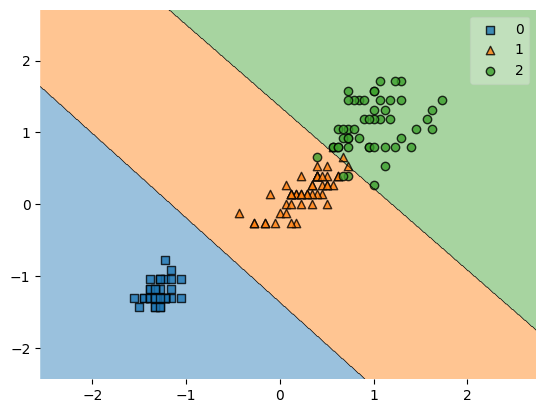

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined,clf=svm)

<Axes: >

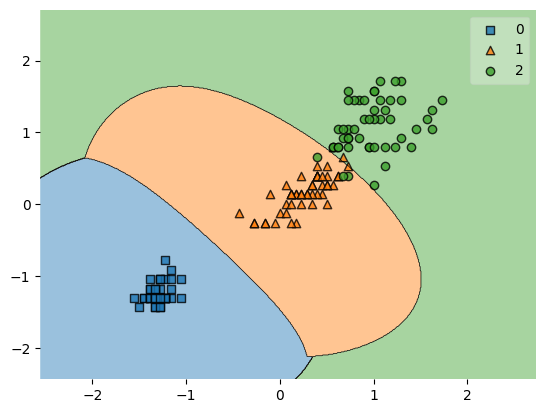

In [19]:
from sklearn.svm import SVC

svm = SVC(C=1.0, random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined,clf=svm)

↑非線形の例。

下はもっとクレイジーな非線形。この場合、線形での分割は不可能。

カーネル手法は、射影関数φを使って、それらの組み合わせを高次元空間へ射影し、線形分離できるようにすること。今回の例では、二次元を三次元の特徴量空間に変換する。

φ(x1,x2)=(z1,z2,z3)=(x1,x2,x1^2+x2^2)

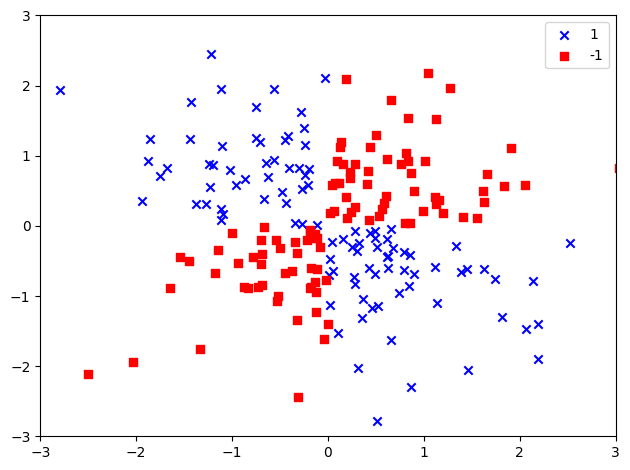

In [20]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

<Axes: >

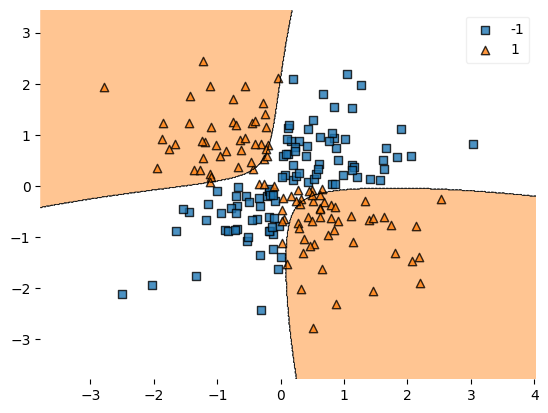

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,clf=svm)

<Axes: >

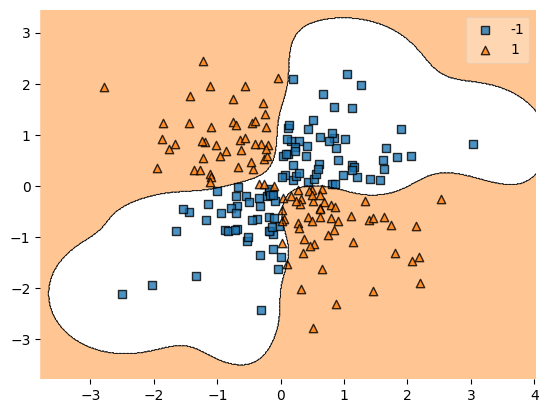

In [22]:
svm = SVC(kernel='rbf', random_state=1, gamma=2, C=1.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,clf=svm)

In [23]:
gammaを大きくすると、訓練データの影響力が大きくなり、到達範囲が広くなる。それにより、決定境界がよる狭くなり、突き出したようになる。

---



SyntaxError: invalid character '、' (U+3001) (3546610834.py, line 1)

# 代替実装
上記のような感じで、代替実装もできる。こっちのがメモリが少なくてすむとかなんとか。

In [ ]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')  # パーセプトロン
Ir=SGDClassifier(loss='log')  # ロジスティック回帰
svm=SGDClassifier(loss='hinge')  # SVM

Ir.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined,clf=Ir)

# 決定木
細かい説明はよーわからんｗ このテキスト、細かい説明すっ飛ばしてるよな…。


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train,y_train)
plot_decision_regions(X_combined, y_combined,clf=tree_model)

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

# ランダムフォレスト
1. データセットからn個のレコードを復元抽出する
1. d個の特徴量をランダムに非復元抽出する
1. ノード分割する
1. これをk回繰り返す
1. 予測するときは、できあがった決定木ごとの予測をまとめ、多数決で決める。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=125, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, clf=forest)

- ここで、n_estimatorsが、25個の決定木を意味している
- n_jobsにより、コンピューターの複数コアを使ってモデルの訓練の処理を並列化できるようになる。

特徴量^(1/2)がdがいいとかなんとか。

# kNN
## 概要
多数決。

1. kの値と距離指標を決める
1. 分類したいデータからk個の最近棒のデータ点を見つけ出す
1. 多数決でクラス分け。

メモリベースのアプローチ。

計算量が増加していくという欠点はある

## 次元の呪い
次元が多くなったら、点同士の距離もまばらになっていってしまう＝うまく動かない

特徴量選択や次元削減の手法で回避できるかも

<Axes: >

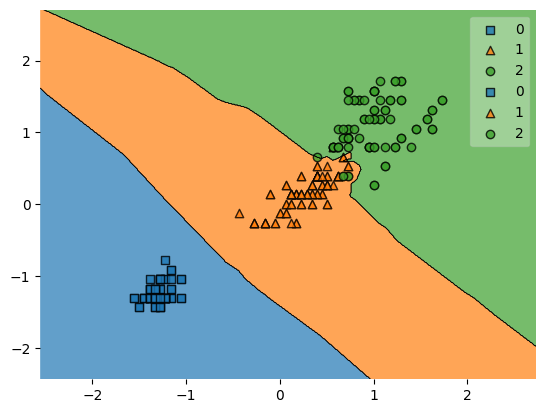

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_train_std,y_train,clf=knn)
plot_decision_regions(X_combined_std,y_combined,clf=knn)

<Axes: >

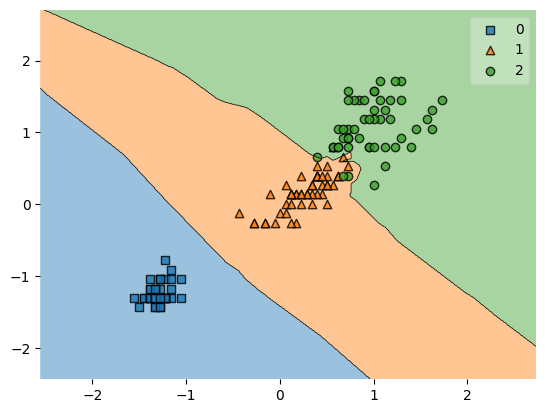